<!-- https://www.kaggle.com/code/iakhtar0/63-next-word-predictor-lstm-campusx -->

In [1]:
%matplotlib inline

In [2]:
import sys
import platform
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import nltk
import sklearn

print("🔧 Environment Information")
print("=" * 40)
print(f"Python version      : {platform.python_version()}")
print(f"TensorFlow version  : {tf.__version__}")
print(f"NumPy version       : {np.__version__}")
print(f"Pandas version      : {pd.__version__}")
print(f"Matplotlib version  : {matplotlib.__version__}")
print(f"Seaborn version     : {sns.__version__}")
print(f"NLTK version        : {nltk.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print("=" * 40)

# Optional: GPU info
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detected: {gpus[0].name}")
else:
    print("⚠️ No GPU detected (running on CPU).")


2025-12-01 15:37:10.290687: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


🔧 Environment Information
Python version      : 3.12.3
TensorFlow version  : 2.20.0
NumPy version       : 2.3.4
Pandas version      : 2.3.3
Matplotlib version  : 3.10.7
Seaborn version     : 0.13.2
NLTK version        : 3.9.2
scikit-learn version: 1.7.2
✅ GPU detected: /physical_device:GPU:0


In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/srirama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Deep Learning library
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D
from tensorflow.keras import backend as K
print(tf.__version__)

2.20.0


In [5]:
from pathlib import Path
NOTEBOOK_DIR  = Path().resolve()
BASE_DIR = NOTEBOOK_DIR.parents[1]
DATASET_DIR = BASE_DIR /  "data" / 'Twitter' / "preprocessed"
DATASET_FILE_PATH = DATASET_DIR  / 'train.csv'
DATASET_FILE_PATH.exists()

True

In [6]:
df = pd.read_csv(DATASET_FILE_PATH,usecols=["sentiment","cleaned_text"])
df["cleaned_text"] = df["cleaned_text"].astype(str)
df.isnull().sum()

sentiment       0
cleaned_text    0
dtype: int64

Max words in a sentence: 189
Average words in a sentence: 19.269247373722838


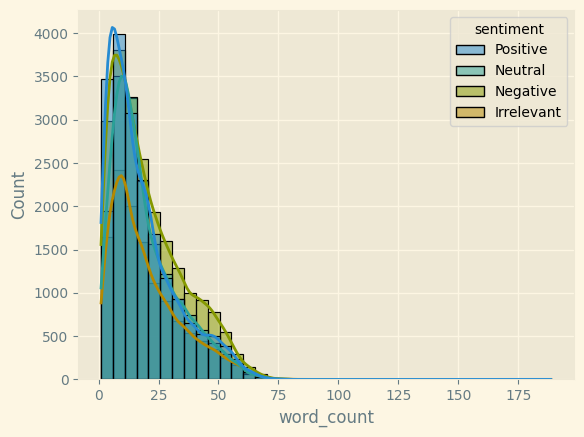

In [7]:
import matplotlib.pyplot as plt
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))
max_words = df["word_count"].max()
avg_words = df["word_count"].mean()
print("Max words in a sentence:", max_words)
print("Average words in a sentence:", avg_words)
plt.style.use('Solarize_Light2')
# sns.set_theme(style="dark")
sns.histplot(data=df,x = 'word_count',hue='sentiment',binwidth=5,kde=True)
plt.show()

In [8]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [9]:
tokenizer = Tokenizer(oov_token="None")
# Gives ID to each word in the sentences (entire column)
tokenizer.fit_on_texts(df['cleaned_text'])
vocab_size  = len(tokenizer.word_index) # 31774 unique words
print("Total unique words : ", vocab_size )
print("Unique words with indices",tokenizer.word_index)

Total unique words :  22499
Unique words with indices {'None': 1, 'the': 2, 'i': 3, 'to': 4, 'now': 5, 'day': 6, 'any': 7, 'a': 8, 'old': 9, 'fart': 10, 'is': 11, 'it': 12, 'for': 13, 'in': 14, 'you': 15, 'this': 16, 'on': 17, 'my': 18, 'that': 19, 'with': 20, 'other': 21, 'game': 22, 'significant': 23, 'me': 24, 'al': 25, 'just': 26, 'not': 27, 'but': 28, 'have': 29, 'environment': 30, 'rich': 31, 'acronym': 32, 'be': 33, 'can': 34, 'was': 35, 'out': 36, 'at': 37, 'like': 38, 'as': 39, 'from': 40, 'god': 41, 'we': 42, 'your': 43, 'they': 44, 'get': 45, 'pic': 46, 'do': 47, 'if': 48, 'one': 49, 'about': 50, 'has': 51, 'what': 52, 'play': 53, 'no': 54, 'wil': 55, 'realy': 56, 'love': 57, 'an': 58, 'when': 59, 'up': 60, 'new': 61, 'more': 62, 'by': 63, 'because': 64, 'johnson': 65, 'how': 66, 'people': 67, 'or': 68, 'se': 69, 'why': 70, 'am': 71, 'shit': 72, 'some': 73, 'going': 74, 'time': 75, 'ben': 76, 'got': 77, 'don': 78, 'best': 79, 'stil': 80, 'go': 81, 'who': 82, 'games': 83, 'gr

In [10]:
sequences  = tokenizer.texts_to_sequences(df['cleaned_text'])
print("Total Sequences",len(sequences) )# = total rows
print("Length of 1st sequence",len(sequences[0])) # = 1st row word count
sequences[:4]

Total Sequences 69490
Length of 1st sequence 14


[[3, 71, 360, 4, 2, 6267, 7, 6, 5, 3, 55, 384, 15, 25],
 [3, 71, 153, 17, 160, 7, 6, 5, 3, 55, 384, 15, 25],
 [3, 71, 360, 17, 160, 7, 6, 5, 3, 55, 1603, 15, 25],
 [3, 71, 153, 17, 160, 7, 6, 5, 3, 55, 1603, 15, 24, 25]]

In [11]:
df.head(5)

,sentiment,cleaned_text,word_count
0,Positive,i am coming to the borders any day now i wil k...,14
1,Positive,i am geting on borderlands any day now i wil k...,13
2,Positive,i am coming on borderlands any day now i wil m...,13
3,Positive,i am geting on borderlands any day now i wil m...,14
4,Positive,i am geting into borderlands any day now i can...,13


In [12]:
maxlen = 75
padded_sentence_sequences = pad_sequences(sequences, maxlen = maxlen, padding='pre')
print("Padded Sequence shape :",padded_sentence_sequences.shape)
padded_sentence_sequences

Padded Sequence shape : (69490, 75)


array([[   0,    0,    0, ...,  384,   15,   25],
       [   0,    0,    0, ...,  384,   15,   25],
       [   0,    0,    0, ..., 1603,   15,   25],
       ...,
       [   0,    0,    0, ...,   91,  269, 1902],
       [   0,    0,    0, ...,  132,  269, 1902],
       [   0,    0,    0, ...,    3,  269, 1902]],
      shape=(69490, 75), dtype=int32)

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])
y = to_categorical(y_encoded)  # one-hot encode for multi-class

In [14]:
y_encoded

array([3, 3, 3, ..., 3, 3, 3], shape=(69490,))

In [15]:
y.shape

(69490, 4)

In [16]:
y

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(69490, 4))

In [17]:
from keras.models import Sequential
from keras.layers import SimpleRNN , Dense , Embedding, LSTM, GRU 
import mlflow
import mlflow.tensorflow
import warnings
warnings.filterwarnings("ignore")

In [18]:
BASE_DIR

PosixPath('/home/srirama/sr_proj/EmotionAnalysis')

In [ ]:
tracking_path = f"sqlite:///{str(BASE_DIR)}/mlflow.db"
mlflow.set_tracking_uri(tracking_path)
print("Tracking URI:", mlflow.get_tracking_uri())
# mlflow.set_tracking_uri("sqlite:///mlflow.db")


'file:///home/srirama/sr_proj/EmotionAnalysis/mlruns'

In [23]:
Path.cwd().joinpath("mlruns").as_uri()

'file:///home/srirama/sr_proj/EmotionAnalysis/notebooks/1-rnn/mlruns'

In [22]:
experiment = mlflow.set_experiment("1-RNN")
experiment.__dict__

2025/12/01 15:38:50 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/01 15:38:50 INFO mlflow.store.db.utils: Updating database tables
2025-12-01 15:38:50 INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
2025-12-01 15:38:50 INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2025-12-01 15:38:50 INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
2025-12-01 15:38:50 INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025-12-01 15:38:50 INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025-12-01 15:38:50 INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025-12-01 15:38:50 INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2025-12-01 15:38:50 INFO  [alembic.runtime.mig

{'_experiment_id': '1',
 '_name': '1-RNN',
 '_artifact_location': '/home/srirama/sr_proj/EmotionAnalysis/notebooks/1-rnn/mlruns/1',
 '_lifecycle_stage': 'active',
 '_tags': {},
 '_creation_time': 1764603533093,
 '_last_update_time': 1764603533093}

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sentence_sequences, y, test_size=0.4, random_state=42)

In [24]:
# Define constants
timestep = maxlen
input_nodes = 1
num_classes = y.shape[1]
# ---- Start MLflow Run manually ----
run =  mlflow.start_run(run_name="post_padding")
# Log preprocessing details
mlflow.log_param("preprocess", "post_padding")
mlflow.log_param("timesteps", timestep)
mlflow.log_param("tokenizer", "Keras Tokenizer")
# ---- Define and compile model ----
model = Sequential()
model.add(SimpleRNN(32, input_shape=(timestep, input_nodes),return_sequences=False))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()
mlflow.tensorflow.autolog()
# ---- Train ----


I0000 00:00:1764603204.121962    1021 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,220 (4.77 KB)

 Trainable params: 1,220 (4.77 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1,
    batch_size=128,
)

2025-12-01 15:33:29.864812: I external/local_xla/xla/service/service.cc:163] XLA service 0x7d4ce40073a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-01 15:33:29.864879: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-12-01 15:33:29.942553: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-01 15:33:30.290006: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91501


  2/326 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.3242 - loss: 0.8331

I0000 00:00:1764603212.328267    1498 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2792 - loss: 0.6259

2025-12-01 15:33:51 WARNI [absl] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


326/326 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - accuracy: 0.2926 - loss: 0.5768 - val_accuracy: 0.3056 - val_loss: 0.5550
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


2025/12/01 15:33:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


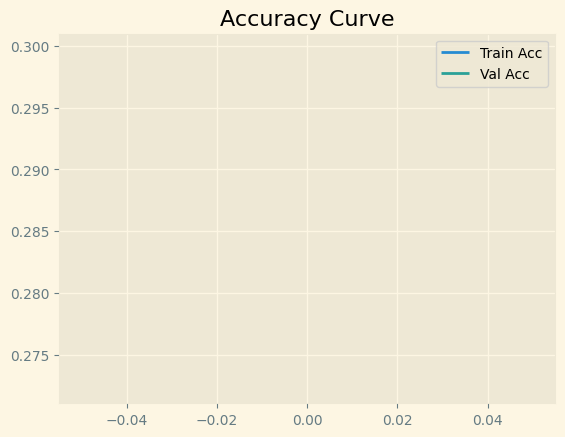

In [24]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
mlflow.log_figure(plt.gcf(), "accuracy_curve.png")
plt.show()

In [ ]:
# loss, accuracy = model.evaluate(X_val,y_val)
# print(f"Test Loss: {loss}")
# print(f"Test Accuracy: {accuracy}")

869/869 [==============================] - 13s 15ms/step - loss: 0.5538 - accuracy: 0.3084
Test Loss: 0.5537537932395935
Test Accuracy: 0.3084256649017334


In [25]:
from mlflow.types import Schema, TensorSpec
from mlflow.models import ModelSignature
import numpy as np
input_schema = Schema([
    TensorSpec(np.dtype(np.float32), (-1, timestep, input_nodes), "input")
])
output_schema = Schema([
    TensorSpec(np.dtype(np.float32), (-1, num_classes), "output")
])
signature = ModelSignature(inputs=input_schema, outputs=output_schema)

In [26]:
# ---- Log Model ----
mlflow.tensorflow.log_model(model, "model",signature=signature)

INFO:tensorflow:Assets written to: C:\Users\SriRam.A\AppData\Local\Temp\tmpilb29oan\model\data\model\assets


869/869 [==============================] - 9s 10ms/step


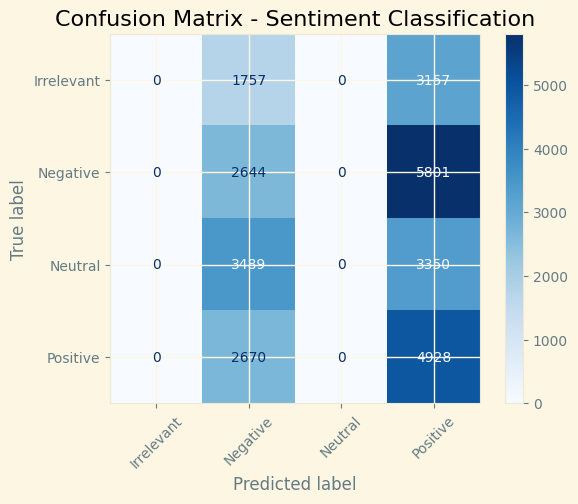


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.00      0.00      0.00      4914
    Negative       0.25      0.31      0.28      8445
     Neutral       0.00      0.00      0.00      6839
    Positive       0.29      0.65      0.40      7598

    accuracy                           0.27     27796
   macro avg       0.13      0.24      0.17     27796
weighted avg       0.15      0.27      0.19     27796



<Figure size 640x480 with 0 Axes>

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# 1️⃣ Make predictions on the validation (test) data
y_pred = model.predict(X_val)

# 2️⃣ Convert probabilities → class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# 3️⃣ Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 4️⃣ Display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Sentiment Classification")
plt.show()
mlflow.log_figure(plt.gcf(), "confusion_matrix.png")
# 5️⃣ Optional: detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))


In [28]:
mlflow.end_run()

In [29]:
active_run = mlflow.active_run()
if active_run:
    print("✅ Active Run:")
    print(f"Run ID: {active_run.info.run_id}")
    print(f"Run Name: {active_run.data.tags.get('mlflow.runName', 'Unnamed')}")
else:
    print("❌ No active run.")

❌ No active run.
